In [2]:
import torch
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(device=None)

'NVIDIA GeForce RTX 4070 Laptop GPU'

In [4]:
# 1. Load Pre-trained Models
resnet = models.resnet101(weights=models.ResNet101_Weights.DEFAULT).to(device).eval()
zfnet = models.alexnet(weights=models.AlexNet_Weights.DEFAULT).to(device).eval()
googlenet = models.googlenet(weights=models.GoogLeNet_Weights.DEFAULT).to(device).eval()

# resnet = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1).to(device).eval()
# zfnet = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1).to(device).eval()
# googlenet = models.googlenet(weights=models.GoogLeNet_Weights.IMAGENET1K_V1).to(device).eval()

In [ ]:
# 2. Data Loading and Preprocessing
data_dir = 'Datasets'  # Replace with actual dataset path

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset
dataset = datasets.ImageFolder(data_dir, transform=transform)
data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

In [6]:
# 3. Feature Extraction Function
def extract_features(model, data_loader):
    features = []
    with torch.no_grad():
        for images, _ in data_loader:
            images = images.to(device)
            outputs = model(images)
            features.append(outputs.cpu().numpy())
    features = np.concatenate(features)
    return features

# Extract features for each model
resnet_features = extract_features(resnet, data_loader)
zfnet_features = extract_features(zfnet, data_loader)
googlenet_features = extract_features(googlenet, data_loader)

In [7]:
# 4. Calculate Nearest Neighbors
def find_nearest_neighbors(features, n_neighbors=10):
    similarity_matrix = cosine_similarity(features)
    neighbors = np.argsort(similarity_matrix, axis=1)[:, -n_neighbors-1:-1]
    return neighbors

resnet_neighbors = find_nearest_neighbors(resnet_features)
zfnet_neighbors = find_nearest_neighbors(zfnet_features)
googlenet_neighbors = find_nearest_neighbors(googlenet_features)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

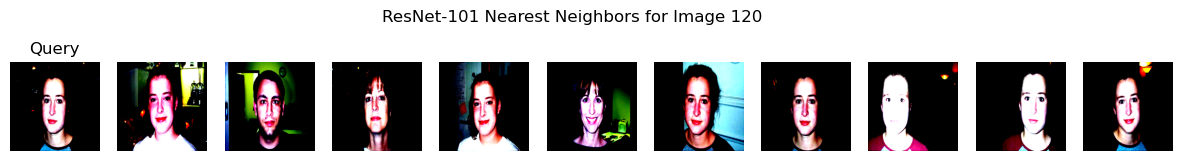

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

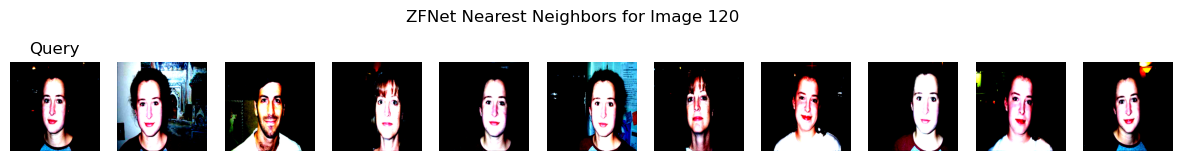

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

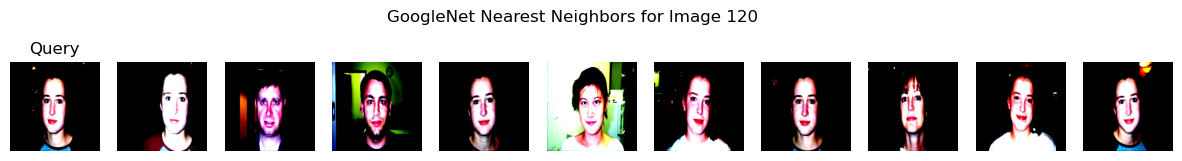

In [8]:
# 5. Visualize Nearest Neighbors
def plot_neighbors(image_idx, neighbors, model_name):
    fig, axs = plt.subplots(1, 11, figsize=(15, 2))
    fig.suptitle(f"{model_name} Nearest Neighbors for Image {image_idx}")
    
    # Show query image
    query_image, _ = dataset[image_idx]
    axs[0].imshow(query_image.permute(1, 2, 0).numpy())
    axs[0].set_title("Query")
    axs[0].axis('off')
    
    # Show neighbors
    for i, neighbor_idx in enumerate(neighbors[image_idx]):
        neighbor_image, _ = dataset[neighbor_idx]
        axs[i + 1].imshow(neighbor_image.permute(1, 2, 0).numpy())
        axs[i + 1].axis('off')
    
    plt.show()

# Example: Display neighbors for a sample image index using each model
image_idx = 120  # Change this to visualize different images
plot_neighbors(image_idx, resnet_neighbors, "ResNet-101")
plot_neighbors(image_idx, zfnet_neighbors, "ZFNet")
plot_neighbors(image_idx, googlenet_neighbors, "GoogleNet")

# 6. Conclusions and Analysis
# You may include a Markdown cell here to summarize and analyze the findings.

